Verify environments

In [1]:
import os
if not os.path.exists("/storage7/NewCluster"):
    raise FileNotFoundError("You should run this script on GEM server!!")

# 0. Preparation

Install `RUR`
```bash
guest@GC11:~$ git clone https://github.com/sanhancluster/rur.git
guest@GC11:~$ cd rur
guest@GC11:~/rur$ ./f2py        # Compile fortran-based functions
guest@GC11:~$ conda develop .   # If you use conda, add this repository to PATH
```

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

from rur import uri

# 1. Snapshot Info

In [50]:
Repository = "/storage7/NewCluster" # Where NC data is stored

# i. Specify the snapshot number
snap = uri.RamsesSnapshot(Repository, 620)

# ii. Specify the redshift
snap = uri.RamsesSnapshot(Repository, 0, z=0.8)

[Output 00620] Age (Gyr) : 6.883 / 13.761, z = 0.80011 (a = 0.5555)
Find nearest iout=620 for z=0.8
[Output 00620] Age (Gyr) : 6.883 / 13.761, z = 0.80011 (a = 0.5555)


## Parameters

In [24]:
params = snap.params
for key, val in params.items():
    print(key, val)

nstar [722026085]
star [ True]
ncpu 960
ndim 3
levelmin 8
levelmax 21
ngridmax 1800000
nstep_coarse 51330
boxlen 1.0
time -0.906141456531244
aexp 0.555520088817122
H0 70.3000030517578
omega_m 0.272000014781952
omega_l 0.727999985218048
omega_k 0.0
omega_b 0.0455
unit_l 2.43385760939328e+26
unit_d 1.47413805897548e-29
unit_t 1.35205671622049e+17
unit_m 2.1253167195715275e+50
h 0.703000030517578
z 0.8001149195690049
boxsize 100.00000585166977
boxsize_physical 79.02135095432726
boxsize_comoving 142.24751281738293
icoarse 51330
ordering hilbert
age 6.882587207036426
lookback_time 6.87827302177066


## Number of Particles

In [25]:
header = snap.extract_header()
for key, val in header.items():
    print(key, val)

total 1547151363
dm 555674169
star 722026085
sink 689
cloud 1453101
tracer 267997944
other_tracer 0
debris_tracer 0
cloud_tracer 3769187
star_tracer 22976506
gas_tracer 241252251
debris 0
other 0
undefined 64


## Particle / Cell columns

In [31]:
dim_keys = ['x', 'y', 'z']
amr_names1 = list(dim_keys[:snap.params['ndim']]) # Position
hydro_names = snap.hydro_names
amr_names2 = ['level', 'cpu']
hydro_names = amr_names1 + hydro_names + amr_names2 
print(hydro_names)

['x', 'y', 'z', 'rho', 'vx', 'vy', 'vz', 'P', 'metal', 'H', 'O', 'Fe', 'Mg', 'C', 'N', 'Si', 'S', 'D', 'd1', 'd2', 'd3', 'd4', 'refmask', 'sigma', 'level', 'cpu']


In [32]:
print( snap.part_dtype )

[('x', 'f8'), ('y', 'f8'), ('z', 'f8'), ('vx', 'f8'), ('vy', 'f8'), ('vz', 'f8'), ('m', 'f8'), ('id', 'i4'), ('level', 'i4'), ('family', 'i1'), ('tag', 'i1'), ('epoch', 'f8'), ('metal', 'f8'), ('m0', 'f8'), ('H', 'f8'), ('O', 'f8'), ('Fe', 'f8'), ('Mg', 'f8'), ('C', 'f8'), ('N', 'f8'), ('Si', 'f8'), ('S', 'f8'), ('D', 'f8'), ('rho0', 'f8'), ('partp', 'i4'), ('cpu', 'i4')]


## Unit conversion

In [33]:
unit = snap.unit
for key, val in unit.items():
    print(key, val)

# physical_length = code_length / length_unit
# ex: R_kpc = R_code / snap.unit['kpc']

cm 4.108703796559748e-27
m 4.1087037965597474e-25
km 4.1087037965597477e-22
pc 1.2654807693404022e-08
kpc 1.2654807693404022e-05
Mpc 0.012654807693404024
Gpc 12.654807693404022
ly 3.887121400811281e-09
cpc 7.029999893803401e-09
ckpc 7.029999893803402e-06
cMpc 0.007029999893803401
cGpc 7.029999893803402
cpc/h 9.999999414833057e-09
ckpc/h 9.99999941483306e-06
cMpc/h 0.009999999414833058
pc/h 1.8001148142322305e-08
kpc/h 1.8001148142322305e-05
Mpc/h 0.018001148142322308
Gpc/h 18.001148142322304
g 4.7051810715609676e-51
kg 4.7051810715609677e-48
Msol 9.410362143121934e-18
Msun 9.410362143121934e-18
yr 2.332742378453341e-10
kyr 2.3327423784533413e-07
Myr 0.00023327423784533414
Gyr 0.23327423784533413
g/cc 6.783625142240721e+28
H/cc 148168.65442262628
Msol/Mpc3 4.643438386601241e-12
Msol/kpc3 0.004643438386601243
km/s 5.5552005630992315e-05
cm/s 5.555200563099232e-10
K 2.566643548546973e-11
Msol/Mpc2 5.876181981860895e-14
Msol/kpc2 5.876181981860897e-08
Msol/pc2 0.058761819818608965
H/cm2 4.

# 2. Snapshot"s" Info

In [41]:
snaps = uri.TimeSeries(snap)
snaps.read_iout_avail()
table = snaps.iout_avail
for i in range(3): print(table[i])
print("...")
for i in range(3): print(table[-3+i])
print(table.dtype.names)

(1, 0.01960784383, 0.04885518219, 0, -22.94095701)
(2, 0.02339434211, 0.06365738233, 8, -20.62695671)
(3, 0.02671554767, 0.07767303599, 15, -19.01684558)
...
(621, 0.5564309543, 6.897576428, 51435, -0.9026502669)
(622, 0.5573474341, 6.912625738, 51542, -0.8991565709)
(623, 0.5582612555, 6.927645631, 51652, -0.8956811235)
('iout', 'aexp', 'age', 'icoarse', 'time')


Text(0, 0.5, 'Redshift')

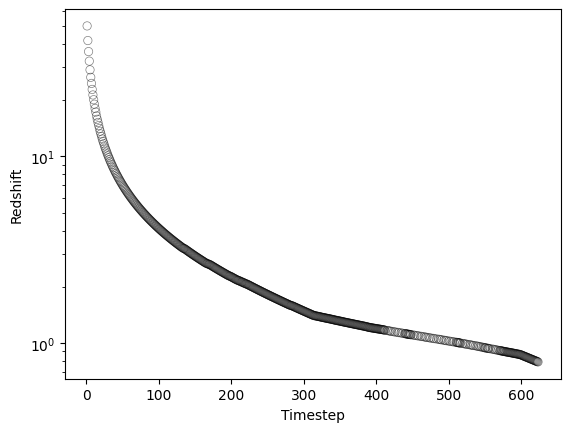

In [48]:
import matplotlib.pyplot as plt
timestep = table['iout']
redshift = 1/table['aexp'] - 1
plt.scatter(timestep, redshift, ec='k', fc='none', lw=0.5, alpha=0.5)
plt.yscale('log')
plt.xlabel('Timestep')
plt.ylabel('Redshift')